# Подключение библиотек

In [115]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

# Сетка(Вариант 8)

In [132]:
ys = [0.0, 0.00017, 0.00199, 0.01282, 0.05744]
xs = [0.52360, 0.87267, 1.22173, 1.57080, 1.91986]


# Поиск коэффициентов

In [117]:
diffs = []
diffs.append([ys[i] for i in range(5)])
while len(diffs[-1]) > 1:
    diffs.append([(diffs[-1][i + 1] - diffs[-1][i]) / (xs[i + len(diffs)] - xs[i]) for i in range(len(diffs[-1]) - 1)])

In [118]:
for d in diffs:
    print (d)

[0.0, 0.00017, 0.00199, 0.01282, 0.05744]
[0.0004870083364368179, 0.005214003323210909, 0.03102529578594551, 0.12782902652839057]
[0.006770938058490668, 0.03697204311909616, 0.13866146812548533]
[0.028839863503251992, 0.09710694812439878]
[0.048892816969007775]


# Функции для работы с многочленами

In [119]:
def add_poly(p, q):
    r = []
    for i in range(max(len(p), len(q))):
        c = 0
        if i < len(p):
            c += p[i]
        if i < len(q):
            c += q[i]
        r.append(c)
    return r

In [120]:
def scale_poly(d, p):
    r = []
    for i in range(len(p)):
        r.append(p[i] * d)
    return r

In [121]:
def mult_poly(p, q):
    r = [0 for i in range(len(p) + len(q) - 1)]
    for i in range(len(p)):
        for j in range(len(q)):
            r[i + j] += p[i] * q[j]
    return r

In [122]:
def eval_poly(p):
    def fun(x):
        xi = 1
        s = 0
        for i in range(len(p)):
            s += p[i] * xi
            xi *= x
        return s
    return fun

In [123]:
def deriv_poly(p):
    return [p[i] * i for i in range(1, len(p))]

# Составление многочлена

In [138]:
poly = []
for n in range(5):
    term = [1]
    for i in range(n):
        term = mult_poly(term, [-xs[i], 1])
    term = scale_poly(diffs[n][0], term)
    poly = add_poly(poly, term)

print(np.poly1d(poly))

         4        3          2
0.02961 x - 0.14 x + 0.2381 x - 0.176 x + 0.04889


In [125]:
print(np.polyval(poly, 1))

0.000630202524628


# Нахождение коэффициентов элементов сплайна

In [126]:
def cspline(i):
    f = eval_poly(poly)
    df = eval_poly(deriv_poly(poly))
    xl = xs[i]
    xr = xs[i + 1]
    fl = f(xl)
    fr = f(xr)
    dfl = df(xl)
    dfr = df(xr)
    return [
        (-dfr * xl**2 * xr * (xr - xl) + fr * xl**2 * (3*xr - xl) + fl * xr**2 * (xr - 3*xl) - dfl * xl * xr**2 * (xr - xl)) / (xr - xl) ** 3,
        (dfr * xl * (2*xr + xl) * (xr - xl) - 6*(fr - fl)*xl*xr + dfl * xr * (xr + 2*xl) * (xr - xl)) / (xr - xl) ** 3,
        (-dfr * (xr - xl) * (xr + 2*xl) + 3*(fr - fl) * (xr + xl) - dfl * (xr - xl) * (xl + 2*xr)) / (xr - xl) ** 3,
        (dfr * (xr - xl) - 2*(fr - fl) + dfl * (xr - xl)) / (xr - xl) ** 3,
    ]

In [127]:
for i in range(4):
    print(cspline(i))

[0.019404737256784713, -0.07760397010155713, 0.09807674866621226, -0.039427221117895664]
[-0.025964241892935638, 0.07836242887417517, -0.08064682020737808, 0.02883986350325304]
[-0.15045549790786994, 0.3840545691664579, -0.3308589974253837, 0.09710694812439995]
[-0.4150450261060874, 0.8893826992975917, -0.6525604656586516, 0.16537403274554624]


In [128]:
splines = [cspline(i) for i in range(4)]

def splined(x):
    for i in range(4):
        if x >= xs[i] and x <= xs[i + 1]:
            return eval_poly(splines[i])(x)
    return None

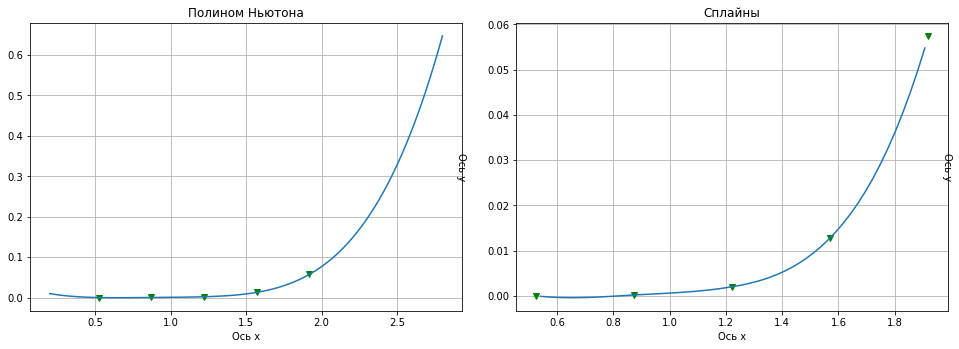

In [139]:
xgr = np.linspace(0.2, 2.8, 100)

fig = plt.figure()
ax1 = fig.add_axes([0.125, 0.547727, 1, 1]) 
ax1.set_title(u'Полином Ньютона')

ax1.yaxis.set_label_position('right')
ax1.set_ylabel(u'Ось y', rotation=270)

ax1.xaxis.set_label_position('bottom')
ax1.set_xlabel(u'Ось x')

ax2 = fig.add_axes([1.25, 0.547727, 1, 1]) 
ax2.set_title(u'Сплайны')

ax2.yaxis.set_label_position('right')
ax2.set_ylabel(u'Ось y', rotation=270)

ax2.xaxis.set_label_position('bottom')
ax2.set_xlabel(u'Ось x')

for ax in fig.axes:
    ax.grid(True)

ax1.plot(xs, ys, 'gv', xgr, [eval_poly(poly)(x) for x in xgr])
ax2.plot(xs, ys, 'gv', xgr, [splined(x) for x in xgr])

# Зум сплайнов

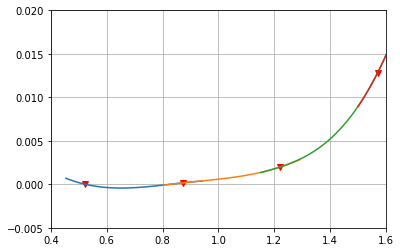

In [130]:
plt.plot(xs, ys, 'rv')
for i in range(4):
    l = np.linspace(xs[i] - 0.2*(xs[i + 1] - xs[i]), xs[i + 1] + 0.2*(xs[i + 1] - xs[i]), 100)
    plt.plot(l, [eval_poly(splines[i])(x) for x in l])
plt.xlim([0.4, 1.6])
plt.ylim([-0.005, 0.02])
plt.grid(True)

# Значения функции и сплайна в точке

In [131]:
print(eval_poly(splines[1])(1))

0.0005912302771144927


In [114]:
print(np.polyval(poly, 1))

0.000630202524628


# Увеличение кол-ва точек

In [144]:
ys = [0.0, 0.00017, 0.00199, 0.01282, 0.05744]
xs = [0.52360, 0.87267, 1.22173, 1.57080, 1.91986]
xs100 = np.linspace(0.52360, 1.91986, 100)
ys100 = np.zeros(100)
for i in range(100):
    ys100[i] = np.polyval(poly, xs100[i])

diffs100 = []
diffs100.append([ys100[i] for i in range(len(xs100))])
while len(diffs100[-1]) > 1:
    diffs100.append([(diffs100[-1][i + 1] - diffs100[-1][i]) / (xs100[i + len(diffs100)] - xs100[i]) for i in range(len(diffs100[-1]) - 1)])

In [145]:
poly100 = []
for n in range(len(xs100)):
    term100 = [1]
    for i in range(n):
        term100 = mult_poly(term100, [-xs100[i], 1])
    term100 = scale_poly(diffs100[n][0], term100)
    poly100 = add_poly(poly100, term100)

In [146]:
def cspline100(i):
    f = eval_poly(poly100)
    df = eval_poly(deriv_poly(poly100))
    xl = xs100[i]
    xr = xs100[i + 1]
    fl = f(xl)
    fr = f(xr)
    dfl = df(xl)
    dfr = df(xr)
    return [
        (-dfr * xl**2 * xr * (xr - xl) + fr * xl**2 * (3*xr - xl) + fl * xr**2 * (xr - 3*xl) - dfl * xl * xr**2 * (xr - xl)) / (xr - xl) ** 3,
        (dfr * xl * (2*xr + xl) * (xr - xl) - 6*(fr - fl)*xl*xr + dfl * xr * (xr + 2*xl) * (xr - xl)) / (xr - xl) ** 3,
        (-dfr * (xr - xl) * (xr + 2*xl) + 3*(fr - fl) * (xr + xl) - dfl * (xr - xl) * (xl + 2*xr)) / (xr - xl) ** 3,
        (dfr * (xr - xl) - 2*(fr - fl) + dfl * (xr - xl)) / (xr - xl) ** 3,
    ]

In [147]:
splines100 = [cspline100(i) for i in range(99)]

def splined100(x):
    for i in range(99):
        if x >= xs100[i] and x <= xs100[i + 1]:
            return eval_poly(splines100[i])(x)
    return None

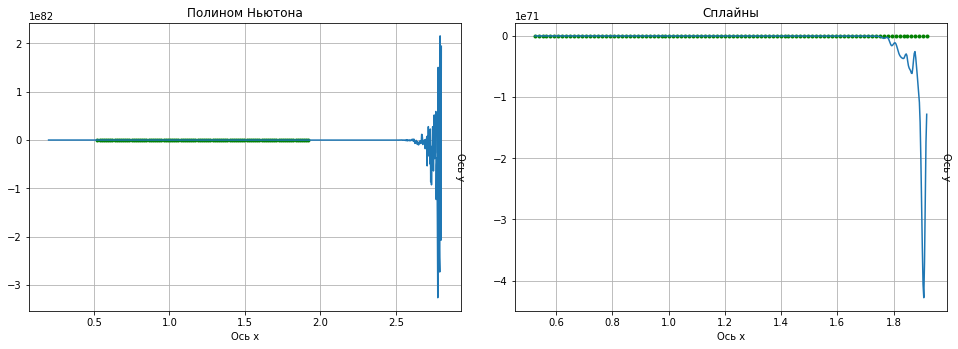

In [149]:
xgr = np.linspace(0.2, 2.8, 1000)

fig = plt.figure()
ax1 = fig.add_axes([0.125, 0.547727, 1, 1]) 
ax1.set_title(u'Полином Ньютона')

ax1.yaxis.set_label_position('right')
ax1.set_ylabel(u'Ось y', rotation=270)

ax1.xaxis.set_label_position('bottom')
ax1.set_xlabel(u'Ось x')

ax2 = fig.add_axes([1.25, 0.547727, 1, 1]) 
ax2.set_title(u'Сплайны')

ax2.yaxis.set_label_position('right')
ax2.set_ylabel(u'Ось y', rotation=270)

ax2.xaxis.set_label_position('bottom')
ax2.set_xlabel(u'Ось x')

for ax in fig.axes:
    ax.grid(True)

ax1.plot(xs100, ys100, 'g.', xgr, [eval_poly(poly100)(x) for x in xgr])
ax2.plot(xs100, ys100, 'g.', xgr, [splined100(x) for x in xgr])